In [45]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_columns', 1000)

1. Descriptive Stats

In [47]:
data_dir = 'data\\'
cvadr = pd.read_csv(data_dir + 'final_dataset.csv')
cvadr.head(2)

,ROW_ID,DRUG_NAME,MASS,ATC_LEVEL_2,ATC_VECTOR,TARGETS,TARGET_VECTOR,REPORT_NO,DATE_RECEIVED,REPORT_TYPE,GENDER,AGE,DEATH,DISABILITY,CONGENITAL_ANOMALY,LIFE_THREATENING,HOSP_REQUIRED,OTHER_MEDICALLY_IMP_COND,REPORTER_TYPE,SOURCE,WEIGHT_KG,INVOLVEMENT,ADMIN_ROUTE,DOSAGE_FORM,CONCOMITANT_DRUGS,ACTIVE_INGREDIENT,REACTION,SOC,SIDER
0,0,BIVALIRUDIN,2180.2853,{'ANTITHROMBOTIC AGENTS': 1},"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",{'Prothrombin': 1},"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",223127,9/10/2007,Spontaneous,Female,38.0,NaN,NaN,NaN,NaN,NaN,NaN,Pharmacist,MAH,NaN,Suspect,Intravenous (not otherwise specified),POWDER FOR SOLUTION INTRAVENOUS,0,BIVALIRUDIN,International normalised ratio increased,Investigations,False
1,1,BIVALIRUDIN,2180.2853,{'ANTITHROMBOTIC AGENTS': 1},"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",{'Prothrombin': 1},"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",223127,9/10/2007,Spontaneous,Female,38.0,NaN,NaN,NaN,NaN,NaN,NaN,Pharmacist,MAH,NaN,Suspect,Intravenous (not otherwise specified),POWDER FOR SOLUTION INTRAVENOUS,0,BIVALIRUDIN,Drug ineffective,General disorders and administration site cond...,False


In [48]:
cvadr = cvadr.rename(columns={'Unnamed: 0': 'ROW_ID'})
cvadr.head(3)

,ROW_ID,DRUG_NAME,MASS,ATC_LEVEL_2,ATC_VECTOR,TARGETS,TARGET_VECTOR,REPORT_NO,DATE_RECEIVED,REPORT_TYPE,GENDER,AGE,DEATH,DISABILITY,CONGENITAL_ANOMALY,LIFE_THREATENING,HOSP_REQUIRED,OTHER_MEDICALLY_IMP_COND,REPORTER_TYPE,SOURCE,WEIGHT_KG,INVOLVEMENT,ADMIN_ROUTE,DOSAGE_FORM,CONCOMITANT_DRUGS,ACTIVE_INGREDIENT,REACTION,SOC,SIDER
0,0,BIVALIRUDIN,2180.2853,{'ANTITHROMBOTIC AGENTS': 1},"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",{'Prothrombin': 1},"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",223127,9/10/2007,Spontaneous,Female,38.0,NaN,NaN,NaN,NaN,NaN,NaN,Pharmacist,MAH,NaN,Suspect,Intravenous (not otherwise specified),POWDER FOR SOLUTION INTRAVENOUS,0,BIVALIRUDIN,International normalised ratio increased,Investigations,False
1,1,BIVALIRUDIN,2180.2853,{'ANTITHROMBOTIC AGENTS': 1},"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",{'Prothrombin': 1},"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",223127,9/10/2007,Spontaneous,Female,38.0,NaN,NaN,NaN,NaN,NaN,NaN,Pharmacist,MAH,NaN,Suspect,Intravenous (not otherwise specified),POWDER FOR SOLUTION INTRAVENOUS,0,BIVALIRUDIN,Drug ineffective,General disorders and administration site cond...,False
2,2,BIVALIRUDIN,2180.2853,{'ANTITHROMBOTIC AGENTS': 1},"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",{'Prothrombin': 1},"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",226246,12/7/2007,Spontaneous,Male,76.0,NaN,NaN,NaN,NaN,NaN,NaN,Other health professional,MAH,NaN,Suspect,Intravenous (not otherwise specified),POWDER FOR SOLUTION INTRAVENOUS,1,BIVALIRUDIN,Drug ineffective,General disorders and administration site cond...,False


In [50]:
cvadr['DATE_RECEIVED'] = pd.to_datetime(cvadr['DATE_RECEIVED'] , yearfirst=True)

In [51]:
cvadr.groupby('REPORT_NO').nunique().max()

ROW_ID                      3
DRUG_NAME                   1
MASS                        1
ATC_LEVEL_2                 1
ATC_VECTOR                  1
TARGETS                     1
TARGET_VECTOR               1
REPORT_NO                   1
DATE_RECEIVED               1
REPORT_TYPE                 1
GENDER                      1
AGE                         1
DEATH                       1
DISABILITY                  1
CONGENITAL_ANOMALY          1
LIFE_THREATENING            1
HOSP_REQUIRED               1
OTHER_MEDICALLY_IMP_COND    1
REPORTER_TYPE               1
SOURCE                      1
WEIGHT_KG                   0
INVOLVEMENT                 1
ADMIN_ROUTE                 1
DOSAGE_FORM                 1
CONCOMITANT_DRUGS           1
ACTIVE_INGREDIENT           1
REACTION                    3
SOC                         3
SIDER                       1
dtype: int64

In [52]:
cvadr.groupby('DRUG_NAME')['ACTIVE_INGREDIENT'].nunique().sort_values(ascending=False)

DRUG_NAME
POLYMYXIN B    1
BIVALIRUDIN    1
Name: ACTIVE_INGREDIENT, dtype: int64

In [53]:
cvadr[cvadr['DRUG_NAME']=='IRON SUCROSE'][['DRUG_NAME','ACTIVE_INGREDIENT']].drop_duplicates()

,DRUG_NAME,ACTIVE_INGREDIENT


In [54]:
# ehh...nevermind the druplicates. dropping duplicates and 

### 1. Descriptive Stats

In [55]:
# count
# distinct count
# null count
# min/max

count = cvadr.count()
dcount = cvadr.nunique()
ncount = cvadr.isna().sum()
dtypes = cvadr.dtypes


In [56]:
desc_stats = pd.concat([count, ncount, dcount, dtypes], axis=1)
desc_stats.columns = ['count', 'empty', 'unique count', 'data type']
desc_stats['empty_%'] = desc_stats['empty']/1034772*100


desc_stats.style.format({'empty_%': '{:,.2f}%'})

,count,empty,unique count,data type,empty_%
ROW_ID,10,0,10,int64,0.00%
DRUG_NAME,10,0,2,object,0.00%
MASS,10,0,2,float64,0.00%
ATC_LEVEL_2,10,0,2,object,0.00%
ATC_VECTOR,10,0,1,object,0.00%
TARGETS,10,0,2,object,0.00%
TARGET_VECTOR,10,0,1,object,0.00%
REPORT_NO,10,0,5,int64,0.00%
DATE_RECEIVED,10,0,5,datetime64[ns],0.00%
REPORT_TYPE,10,0,1,object,0.00%


In [58]:
desc_stats.to_csv(data_dir + 'desc_stats.csv')

In [59]:
cvadr.describe().round()

,ROW_ID,MASS,REPORT_NO,AGE,DEATH,DISABILITY,CONGENITAL_ANOMALY,LIFE_THREATENING,HOSP_REQUIRED,OTHER_MEDICALLY_IMP_COND,WEIGHT_KG,CONCOMITANT_DRUGS
count,10.0,10.0,10.0,10.0,5.0,5.0,5.0,5.0,5.0,7.0,0.0,10.0
mean,661945.0,1692.0,451382649.0,39.0,2.0,2.0,2.0,1.0,1.0,1.0,NaN,2.0
std,697749.0,515.0,475476309.0,29.0,0.0,0.0,0.0,1.0,1.0,0.0,NaN,4.0
min,0.0,1203.0,223127.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,NaN,0.0
25%,2.0,1203.0,277019.0,11.0,2.0,2.0,2.0,1.0,1.0,1.0,NaN,0.0
50%,661945.0,1692.0,451381387.0,41.0,2.0,2.0,2.0,1.0,1.0,1.0,NaN,0.0
75%,1323888.0,2180.0,902333437.0,64.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0
max,1323890.0,2180.0,902647503.0,76.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,9.0


In [ ]:
# count distinct reorts, drugs, and SE per year
# fix dates prior to 1970

counts_by_year = cvadr.groupby(cvadr['DATE_RECEIVED'].dt.year)['REPORT_NO','ACTIVE_INGREDIENT','REACTION',].nunique()
counts_by_year['REPORTS'] = cvadr.groupby(cvadr['DATE_RECEIVED'].dt.year)['REPORT_NO'].count()
counts_by_year = counts_by_year.reset_index()
counts_by_year['DATE_RECEIVED'] = counts_by_year['DATE_RECEIVED'].apply(lambda x: x if x < 2020 else x-100)
counts_by_year.head()

# melt for plotting
counts_by_year_melt = counts_by_year.melt(id_vars='DATE_RECEIVED', value_vars=['REPORT_NO','ACTIVE_INGREDIENT','REACTION', 'REPORTS'], var_name='VAR', value_name='COUNT')


In [ ]:
counts_by_year.head()

In [ ]:

fig, ax = plt.subplots(figsize=(15,5))

sns.lineplot(x='DATE_RECEIVED', y='COUNT', data=counts_by_year_melt, hue='VAR', ax=ax)

plot1 = plt.xlabel('Year')
plot1 = plt.ylabel('Count')
plot1 = plt.title("Reports, Drugs, and Active Ingredients by Year")

plot1_labels = ax.get_legend_handles_labels()[0][1:5]
ax.legend(plot1_labels, ['Unique Reports','Unique Ingredients','Unique Side Effects', 'Total Rows'])

# fig.autofmt_xdate()

plt.show()

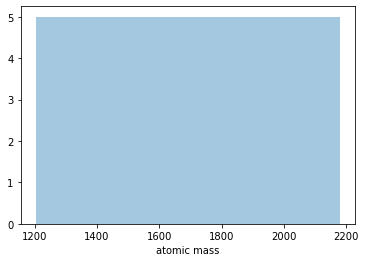

In [65]:
# histogram for mass

x = cvadr[['MASS']]
ax = sns.distplot(x, axlabel='atomic mass', kde=False)



In [ ]:
# tree plot of atc category
# T/F for colour

In [ ]:
# tree plot for targets
# T/F for colour

In [ ]:
# bar plot for report type

In [ ]:
# bar plot for gender

In [ ]:
# stacked bar plto for seriousness flags

In [ ]:
# bar plot for reporter type

In [ ]:
# bar plot for source type

ZeroDivisionError: division by zero

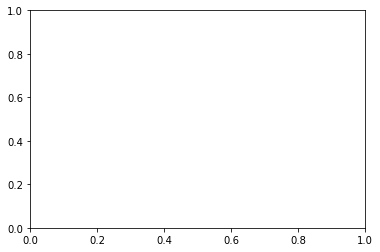

In [73]:
# histogram for weight

x = cvadr[cvadr['WEIGHT_KG'].notnull()]
ax = sns.distplot(x, axlabel='Patient Weight (kg)', kde=False)

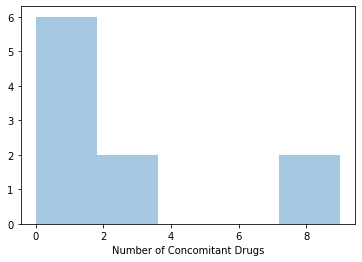

In [64]:
# histogram for concomitant drugs

x = cvadr[['CONCOMITANT_DRUGS']]
ax = sns.distplot(x, axlabel='Number of Concomitant Drugs', kde=False)

In [ ]:
# Plot number of S/E per report and per active ingredients

se_ratio = pd.concat([counts_by_year['DATE_RECEIVED'], counts_by_year['REACTION']/counts_by_year['ACTIVE_INGREDIENT'], counts_by_year['REACTION']/counts_by_year['REPORT_NO']], axis=1)

se_ratio.columns = ['YEAR', 'REACTIONS_PER_INGR', 'REACTIONS_PER_REPORT']

se_ratio.head()

In [ ]:
# melt for plotting
se_ratio_melt = se_ratio.melt(id_vars='YEAR', value_vars=['REACTIONS_PER_INGR', 'REACTIONS_PER_REPORT'], var_name='VAR', value_name='COUNT')

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))

sns.lineplot(x='YEAR', y='COUNT', data=se_ratio_melt, hue='VAR', ax=ax)

plot2 = plt.xlabel('Year')
plot2 = plt.ylabel('Count')
plot2 = plt.title("Number of Side Effects Per Ingredient and Report by Year")

plot1_labels = ax.get_legend_handles_labels()[0][1:3]
ax.legend(plot1_labels, ['Per Ingredient','Per Report'])

# fig.autofmt_xdate()

plt.show()

In [ ]:
import textwrap

fig, ax = plt.subplots(2,3, figsize=(15,10), sharex=False)
plt.subplots_adjust(hspace=.6, wspace=.4)

plot3 = sns.countplot(x='REPORT_TYPE', data=cvadr, ax=ax[0,0])
plot3.set_xticklabels([textwrap.fill(e.get_text(),20) for e in list(plot3.get_xticklabels())], rotation=45, horizontalalignment='right')
plot3 = plt.xlabel('Report Type')
plot3 = plt.ylabel('Count')

plot4 = sns.countplot(x='REPORTER_TYPE', data=cvadr, ax=ax[1,0])
plot4.set_xticklabels([textwrap.fill(e.get_text(),20) for e in list(plot4.get_xticklabels())], rotation=45, horizontalalignment='right')
plot4 = plt.xlabel('Report Type')
plot4 = plt.ylabel('Count')

plot5 = sns.countplot(x='SOURCE', data=cvadr, ax=ax[0,1])
plot5.set_xticklabels([textwrap.fill(e.get_text(),20) for e in list(plot5.get_xticklabels())], rotation=45, horizontalalignment='right')
plot5 = plt.xlabel('Source')
plot5 = plt.ylabel('Count')

plot6 = sns.countplot(x='GENDER', data=cvadr, ax=ax[1,1])
plot6.set_xticklabels([textwrap.fill(e.get_text(),20) for e in list(plot6.get_xticklabels())], rotation=45, horizontalalignment='right')
plot6 = plt.xlabel('Gender')
plot6 = plt.ylabel('Count')

#plot7 = sns.countplot(x='SERIOUSNESS_ENG', data=cvadr, ax=ax[0,2])
#plot7.set_xticklabels([textwrap.fill(e.get_text(),20) for e in list(plot7.get_xticklabels())], rotation=45, horizontalalignment='right')
#plot7 = plt.xlabel('Seriousness')
#plot7 = plt.ylabel('Count')

plot8 = sns.distplot(cvadr['AGE'], ax=ax[1,2], kde=False)
plot8 = plt.xlabel('Age')
plot8 = plt.ylabel('Count')


# Show plot
plt.show()

In [ ]:
# there doesn't seem to be a relationship bewteen age ad concomitant drugs

cvadr1 = cvadr[['GENDER',
       'AGE', 'REPORTER_TYPE', 'SOURCE',
       'ADMIN_ROUTE', 'CONCOMITANT_DRUGS']]

sns.pairplot(cvadr1)

plt.show()

In [ ]:
# box and whisker plot for mass

In [ ]:
# time series plot wtih color for outcomes

In [ ]:
# scatter plot/box and whisker plot for report type

In [ ]:
# scatter plot/box and whisker plot for gender

In [ ]:
# scatter plot/box and whisker plot for report type

In [ ]:
# scatter plot/box  for age with outcome as colour

In [ ]:
# scatter plot for each seriousness flag?

In [ ]:
# reporter type: scatter plot with reporter type as colour; mosaic plot

In [ ]:
# source: scatter plot with reporter type as colour; mosaic plot

In [ ]:
# weight: box and whisker

In [ ]:
# admin route: scatter plot with dosage as color

In [ ]:
# dosage form: scatter plot with dosage as color

In [ ]:
# concomitant drugs: scattter plot